### Визуализация в Python

Сегодня мы разберем с вами несколько библиотек, специализирующихся на построение визуализаций в Python и попробуем построить различные типы графиков с их использованием на реальных данных — каталоге смартфонов 2018–2022 гг.:

1. Линейный график
2. Тепловая карта
3. Диаграмма рассеяния (точечная диаграмма)
4. Гистограмма 
5. Столбчатая диаграмма
6. Диаграмма размаха ("ящик с усами")
7. Круговая диаграмма

Также рассмотрим более подробно, как комбинировать графики между собой, поговорим поподробнее о существующих параметрах настройки их отображения и об особенностях каждой библиотеки.

In [79]:
import numpy as np 
import pandas as pd 
!pip install openpyxl

You should consider upgrading via the 'C:\Users\tg082\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [80]:
# Загрузка и подготовка данных
import re

df = pd.read_excel('Itog_phone.xlsx')

# Удаление полностью пустых строк
df = df.dropna(how='all')

# Приведение размера экрана к числовому формату
def parse_screen_size(val):
    match = re.search(r'[\d.]+', str(val).replace(',', '.'))
    return float(match.group()) if match else None

df['Screen Size (inches)'] = df['Screen Size (inches)'].apply(parse_screen_size)

# Убедимся, что все столбцы числовые там, где нужно
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df = df.dropna(subset=['Price ($)'])
df = df[df['Price ($)'] > 1.3]
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Year
0,Apple,iPhone 13 Pro,128,6,6.10,12,3095,999.0,2021
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108,5000,1199.0,2021
2,OnePlus,9 Pro,128,8,6.70,48,4500,899.0,2021
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64,5020,279.0,2021
4,Google,Pixel 6,128,8,6.40,50,4614,799.0,2021


In [81]:
df['Price ($)'].sort_values()

53       99.0
107      99.0
261      99.0
109      99.0
250      99.0
        ...  
57     1299.0
288    1299.0
367    1399.0
361    1399.0
373    1999.0
Name: Price ($), Length: 404, dtype: float64

### Библиотека Matplotlib

In [82]:
import matplotlib.pyplot as plt

### Библиотека Seaborn

In [83]:
import seaborn as sns

### Библиотека Plotly

In [84]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

You should consider upgrading via the 'C:\Users\tg082\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Построение линейного графика

#### Matplotlib 

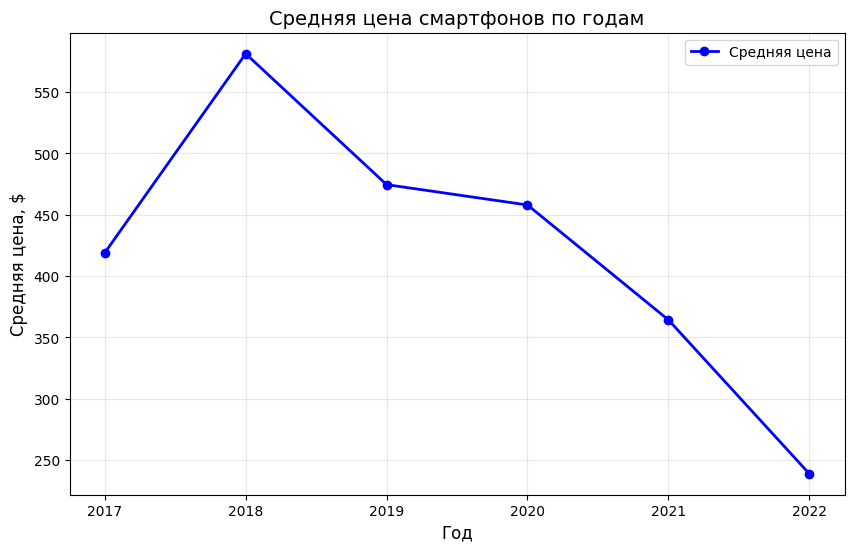

In [85]:
# Динамика средней цены по годам
price_by_year = df.groupby('Year')['Price ($)'].mean()
x = price_by_year.index
y = price_by_year.values

plt.figure(figsize=(10, 6))
plt.plot(x, y, 
         color='blue',
         linewidth=2,
         marker='o',
         markersize=6,
         label='Средняя цена')

plt.title('Средняя цена смартфонов по годам', fontsize=14, fontweight='light')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средняя цена, $', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

#### Seaborn

C:\Users\tg082\AppData\Local\Temp\ipykernel_12660\132710619.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




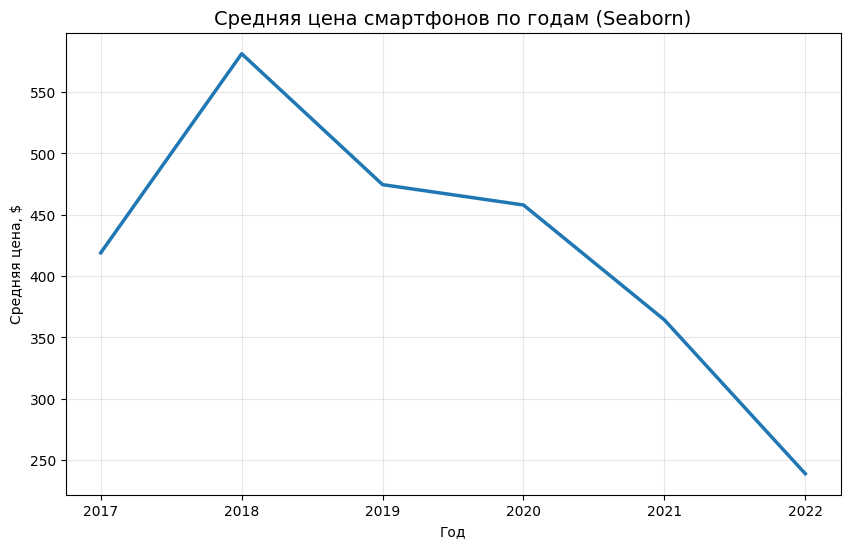

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price ($)', data=df, estimator='mean', ci=None, linewidth=2.5)

plt.title('Средняя цена смартфонов по годам (Seaborn)', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Средняя цена, $')
plt.grid(True, alpha=0.3)
plt.show()

#### Plotly (не получается отображение)

In [87]:
!pip install nbformat
!pip install jupyter ipywidgets
!jupyter nbextension enable --py widgetsnbextension

You should consider upgrading via the 'C:\Users\tg082\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\tg082\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
'jupyter' is not recognized as an internal or external command,
operable program or batch file.


### Построение тепловой карты

#### Matplotlib

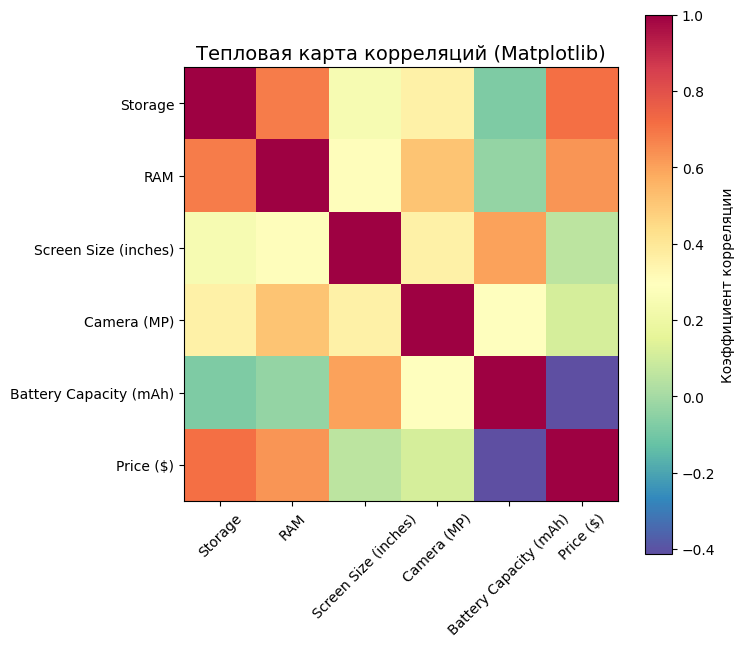

In [88]:
corr = df[['Storage', 'RAM', 'Screen Size (inches)', 'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)']].corr()

plt.figure(figsize=(7, 7))
тк = plt.imshow(corr, cmap='Spectral_r')
plt.colorbar(тк, label='Коэффициент корреляции')
plt.title('Тепловая карта корреляций (Matplotlib)', fontsize=14)
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.show()

#### Seaborn

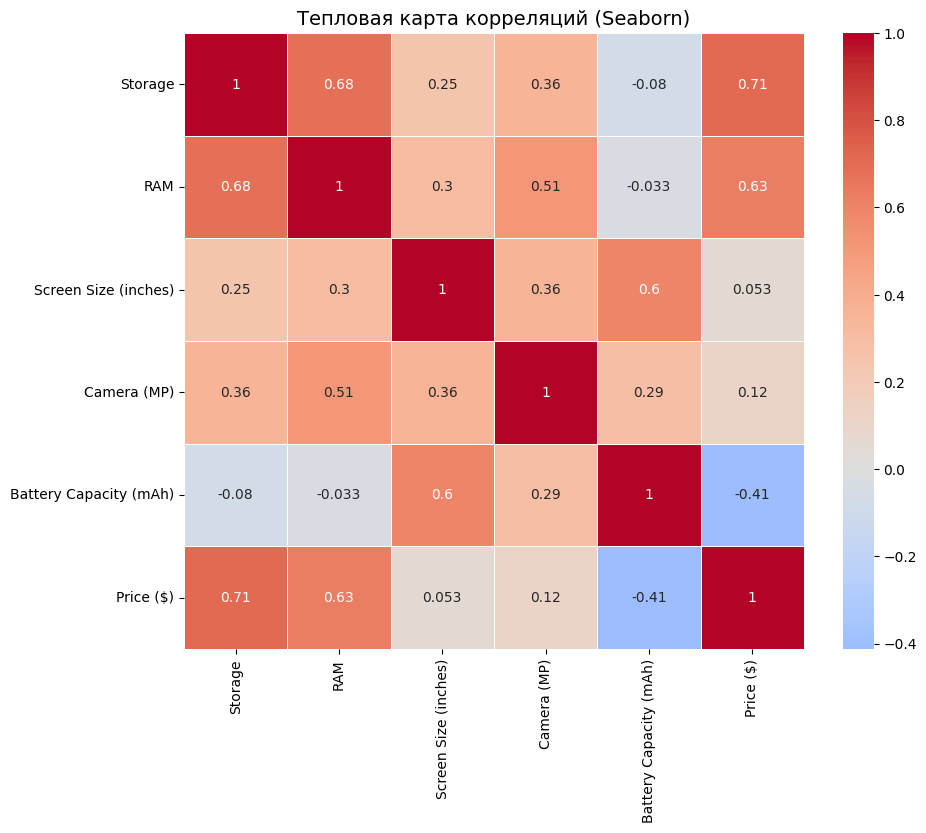

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Тепловая карта корреляций (Seaborn)', fontsize=14)
plt.show()

#### Plotly (ничего дельного)

In [90]:
fig = go.Figure(data=go.Heatmap(
    z=corr.values[::-1],
    x=corr.columns,
    y=corr.columns[::-1],
    colorscale='RdBu',
    zmid=0,
    text=corr.round(2).values[::-1],
    texttemplate='%{text}',
    hoverongaps=False
))

fig.update_layout(
    title='Интерактивная корреляционная тепловая карта',
    width=600,
    height=600,
    xaxis_title='Параметры',
    yaxis_title='Параметры'
)
fig.show()

### Построение точечной диаграммы (диаграммы рассеяния)

#### Matplotlib

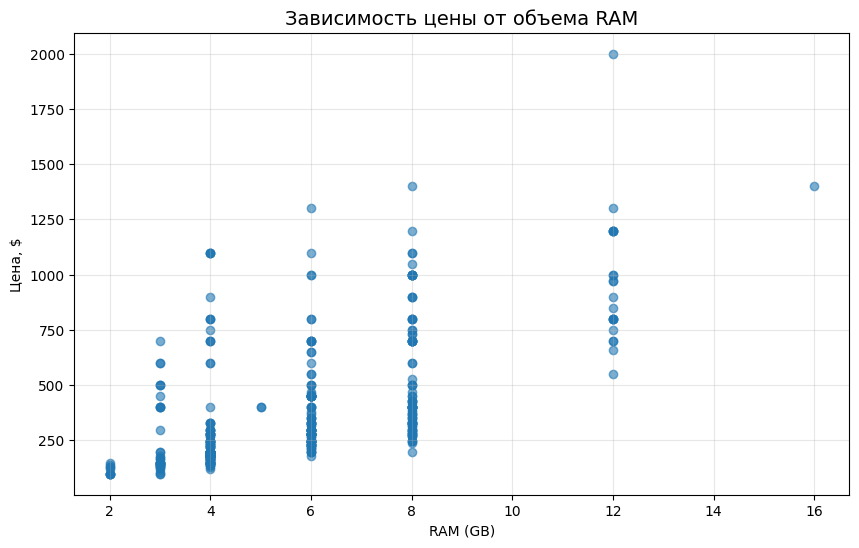

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM'], df['Price ($)'], alpha=0.6)
plt.title('Зависимость цены от объема RAM', fontsize=14)
plt.xlabel('RAM (GB)')
plt.ylabel('Цена, $')
plt.grid(True, alpha=0.3)
plt.show()

#### Seaborn

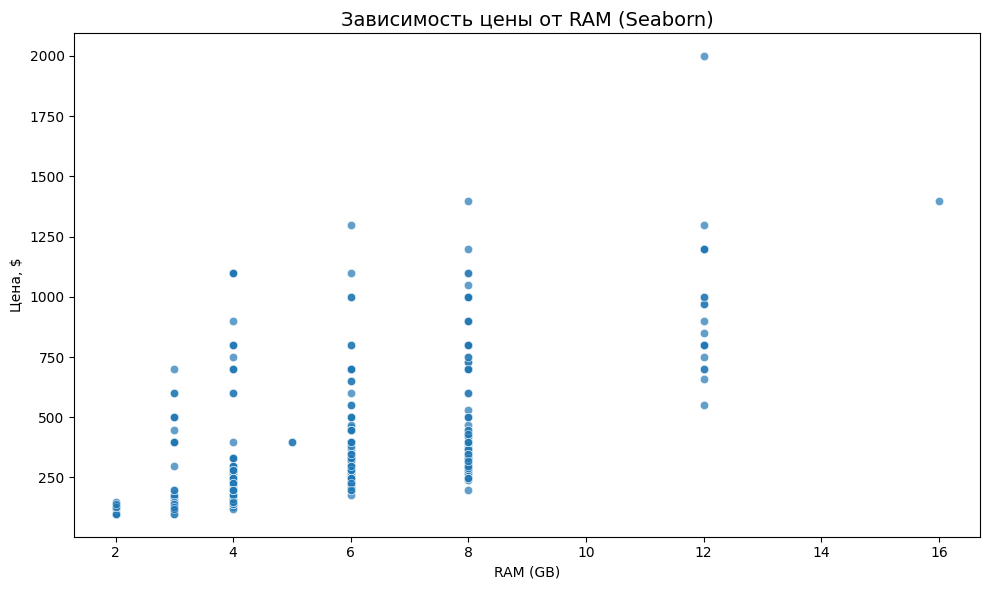

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price ($)', alpha=0.7)
plt.title('Зависимость цены от RAM (Seaborn)', fontsize=14)
plt.xlabel('RAM (GB)')
plt.ylabel('Цена, $')
plt.tight_layout()
plt.show()

#### Plotly

In [93]:
fig = px.scatter(df, x='RAM', y='Price ($)',
                 title='Интерактивная диаграмма рассеяния: RAM vs Цена',
                 labels={'RAM': 'RAM (GB)', 'Price ($)': 'Цена, $'})

fig.update_layout(width=800, height=500, template='plotly_white')
fig.show()

### Построение гистограммы

#### Matplotlib

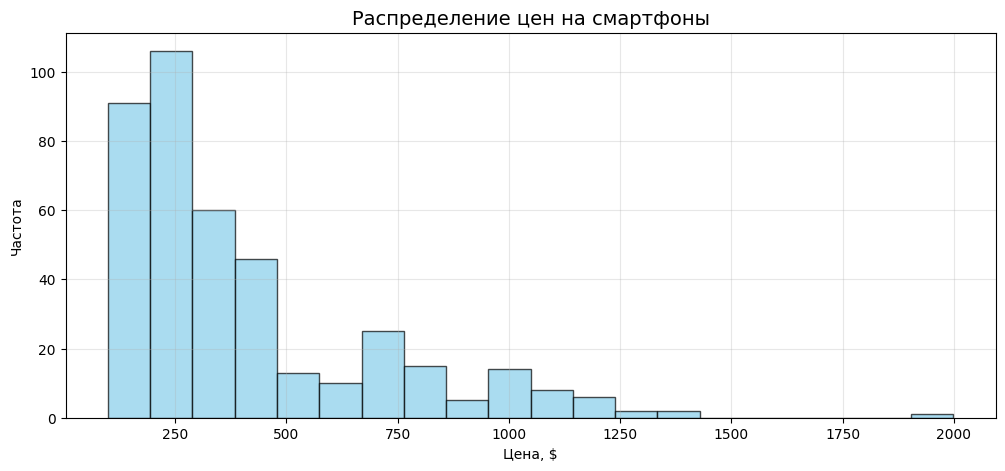

In [105]:
plt.figure(figsize=(12, 5))
plt.hist(df['Price ($)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение цен на смартфоны', fontsize=14)
plt.xlabel('Цена, $')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

#### Seaborn

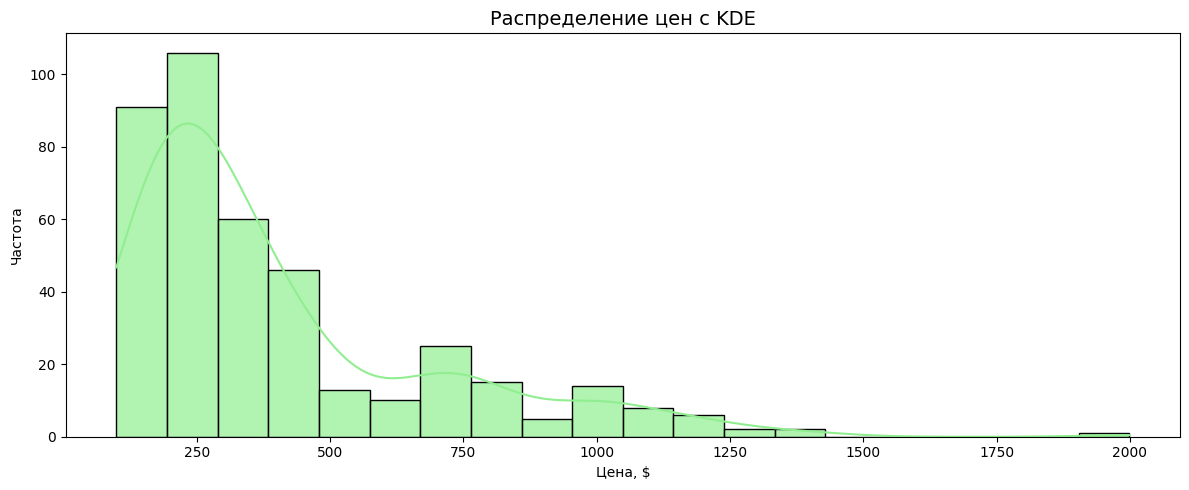

In [106]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Price ($)'], bins=20, kde=True, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Распределение цен с KDE', fontsize=14)
plt.xlabel('Цена, $')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

#### Plotly

In [96]:
fig = px.histogram(df, x='Price ($)', nbins=30,
                   title='Интерактивная гистограмма цен',
                   opacity=0.7, color_discrete_sequence=['lightseagreen'])

fig.update_layout(width=600, height=500, bargap=0.1)
fig.update_traces(marker=dict(line=dict(width=1, color='red')))
fig.show()

### Построение столбчатых диаграмм

#### Matplotlib

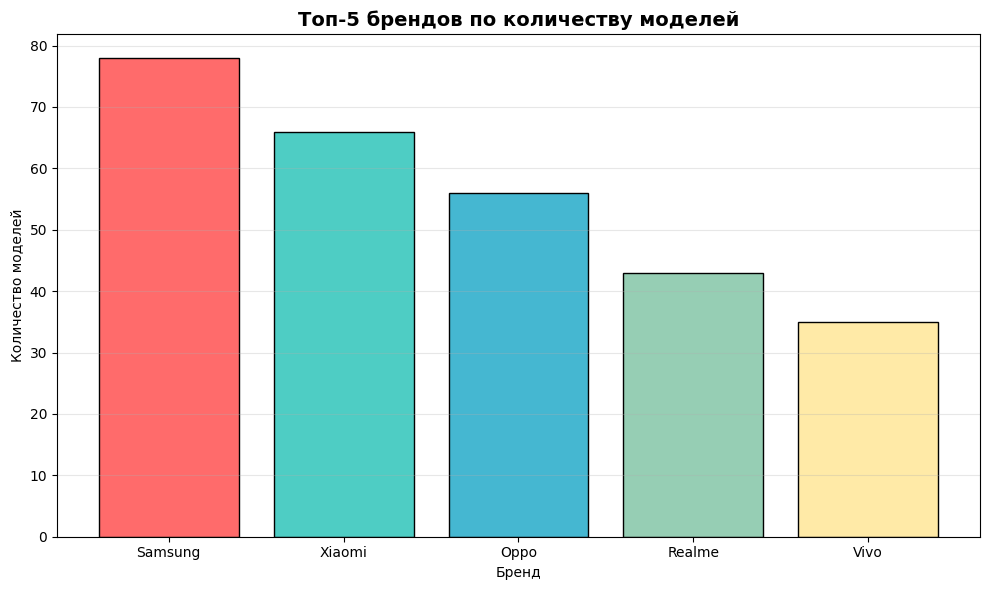

In [107]:
top_brands = df['Brand'].value_counts().head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_brands.index, top_brands.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'], edgecolor='black')
plt.title('Топ-5 брендов по количеству моделей', fontsize=14, fontweight='bold')
plt.xlabel('Бренд')
plt.ylabel('Количество моделей')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Seaborn

C:\Users\tg082\AppData\Local\Temp\ipykernel_12660\939040540.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




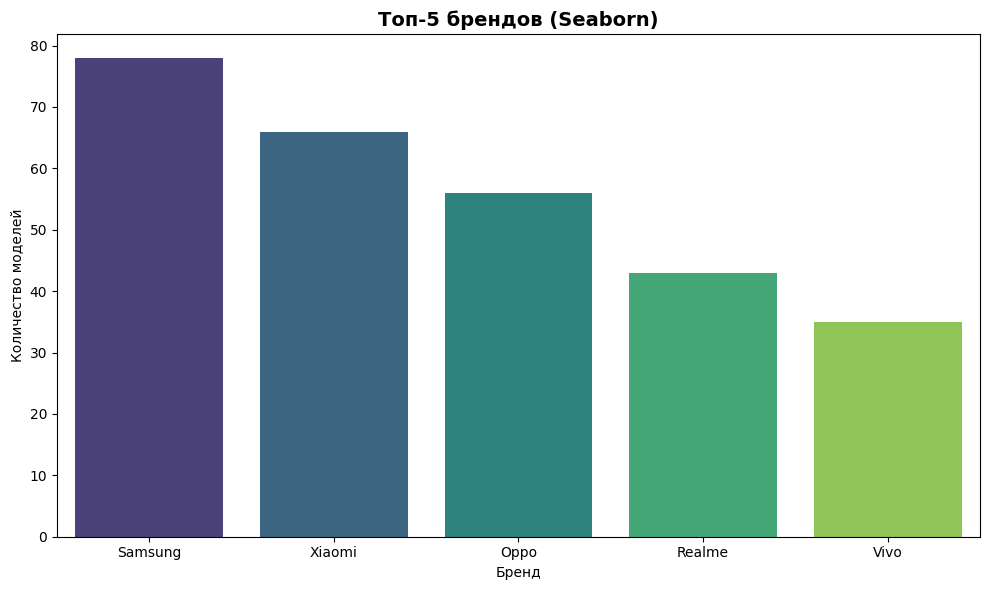

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Топ-5 брендов (Seaborn)', fontsize=14, fontweight='bold')
plt.xlabel('Бренд')
plt.ylabel('Количество моделей')
plt.tight_layout()
plt.show()

#### Plotly

In [99]:
fig = px.bar(x=top_brands.index, y=top_brands.values,
             title='Топ-5 брендов по количеству моделей',
             labels={'x': 'Бренд', 'y': 'Количество моделей'},
             text=top_brands.values)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(template='plotly_white', showlegend=False)
fig.show()

### Построение диаграммы размаха ("ящик с усами")

#### Matplotlib

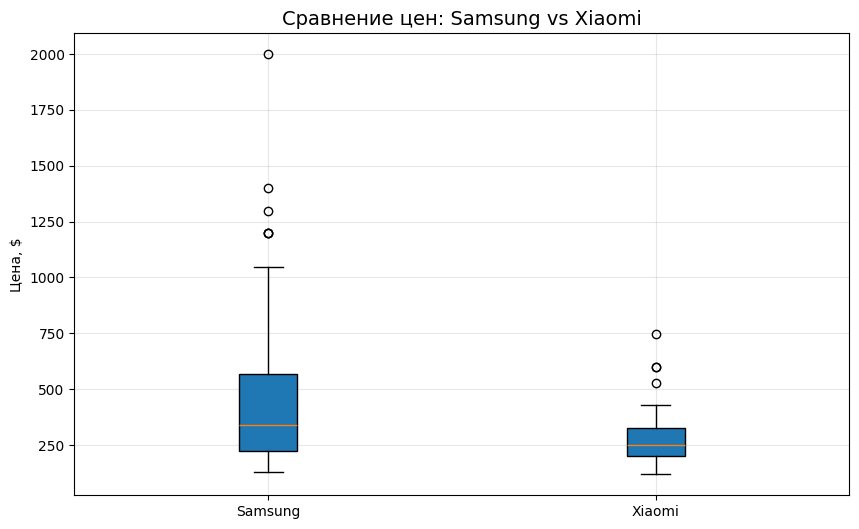

In [110]:
samsung_prices = df[df['Brand'] == 'Samsung']['Price ($)'].dropna()
xiaomi_prices = df[df['Brand'] == 'Xiaomi']['Price ($)'].dropna()

plt.figure(figsize=(10, 6))
plt.boxplot([samsung_prices, xiaomi_prices], tick_labels=['Samsung', 'Xiaomi'],
            patch_artist=True, meanline=True)
plt.title('Сравнение цен: Samsung vs Xiaomi', fontsize=14)
plt.ylabel('Цена, $')
plt.grid(True, alpha=0.3)
plt.show()

#### Seaborn

C:\Users\tg082\AppData\Local\Temp\ipykernel_12660\1871211959.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




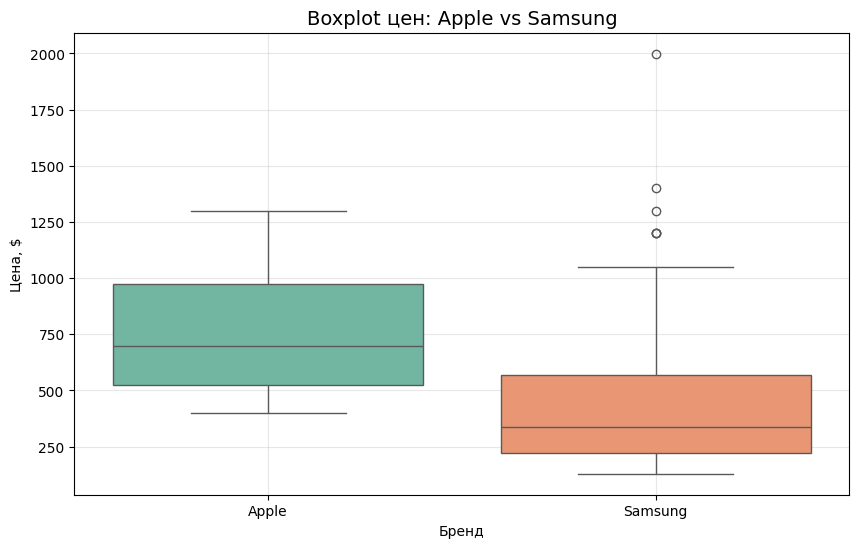

In [101]:
df_apple_samsung = df[df['Brand'].isin(['Apple', 'Samsung'])]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_apple_samsung, x='Brand', y='Price ($)', palette='Set2')
plt.title('Boxplot цен: Apple vs Samsung', fontsize=14)
plt.xlabel('Бренд')
plt.ylabel('Цена, $')
plt.grid(True, alpha=0.3)
plt.show()

#### Plotly

In [102]:
fig = px.box(df_apple_samsung, x='Brand', y='Price ($)',
             title='Интерактивная диаграмма размаха: Apple vs Samsung',
             points='outliers')

fig.update_layout(width=600, height=500, showlegend=False)
fig.show()

### Построение круговой диаграммы

#### Matplotlib

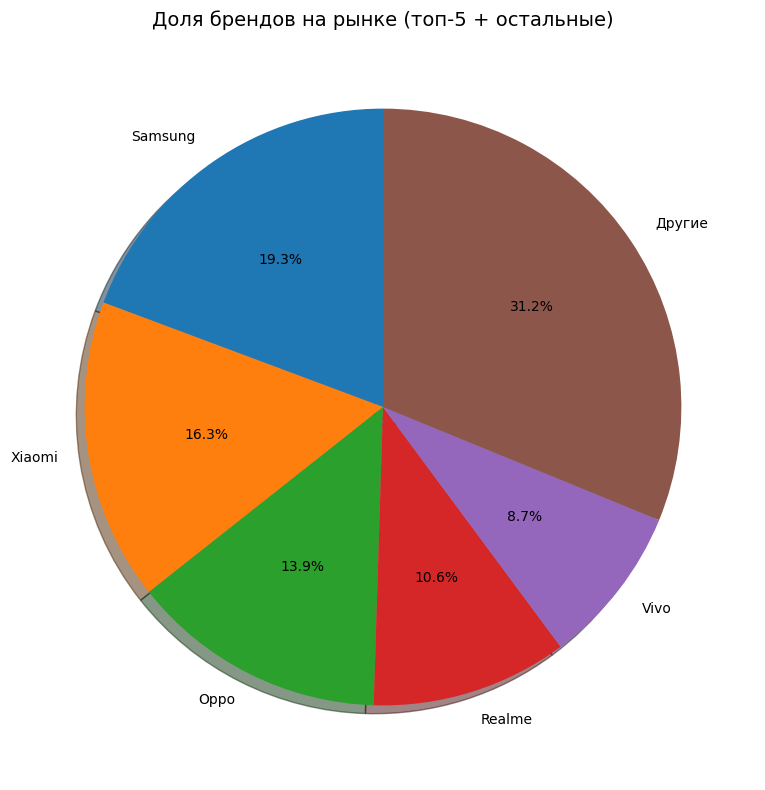

In [103]:
brand_counts = df['Brand'].value_counts()
top5 = brand_counts.head(5)
others = pd.Series({'Другие': brand_counts[5:].sum()})
final = pd.concat([top5, others])

plt.figure(figsize=(8, 8))
plt.pie(final.values, labels=final.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Доля брендов на рынке (топ-5 + остальные)', fontsize=14)
plt.tight_layout()
plt.show()

#### Plotly

In [104]:
fig = px.pie(names=final.index, values=final.values,
             title='Доля брендов (Plotly)', hole=0.3)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=600, height=600)
fig.show()